## Library (Module)
#### &nbsp; numpy : Matrix Calculation Tool  (Ref. http://www.numpy.org/)
#### &nbsp; matplotlib : Mathematical Plotting Tool  (Ref. https://matplotlib.org/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

#### LR_CF : Linear Regression Closed form Solution
&nbsp; Input : Data Matrix $ \Phi$ and Label $Y$ &nbsp; Output : Weight matrix $ \theta$ <p>
#### RR_CF : Ridge Regression Closed form Solution <p>
&nbsp; Input : Data Matrix $ \Phi$, $\lambda$ and Label $Y$ &nbsp; Output : Weight matrix $ \theta$ <p>
#### LS_Err : Ls Error <p>
&nbsp; Input : Data Matrix $ \Phi$, Weight matrix $ \theta$ and Label $Y$ &nbsp; Output : LS Error <p>

In [3]:
def LR_CF(X,Y):
    Theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), Y)
    return Theta
def RR_CF(X,Y,lamda):
    Theta_RR=np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X) + lamda * np.identity(3)), X.transpose()), Y)
    return Theta_RR
def LS_Err(Theta,X,Y):
    Temp = np.matmul(X, Theta) - Y
    Err = 0.5 * np.matmul(Temp.transpose(), Temp)
    return Err

## Data set
#### Train : Data Matrix $\Phi$
#### Val : Validation Data set for Evaluation

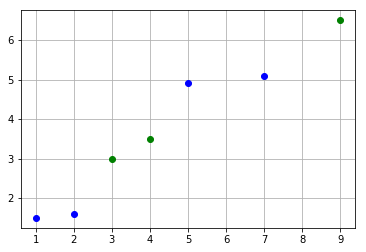

In [13]:
X_Train=np.array([[1,1,1],[1,2,4],[1,5,25],[1,7,49]])
Y_Train=np.array([1.5,1.6,4.9,5.1])


X_Val= np.array([[1,9,81], [1,4,16], [1,3,9]])
Y_Val= np.array([6.5, 3.5, 3])


#Blue dots represent Training set and Green Dots represent validation set
plt.plot(X_Train[:,1],Y_Train,'bo')
plt.plot(X_Val[:,1],Y_Val,'go')
plt.grid()
plt.show()

## Linear Regression
### 1) P=2 Case 

In [14]:
#To Test the P=2 case, Only first 2 columns are used.
X_Train_ord2=X_Train[:,:2]
X_Val_ord2=X_Val[:,:2]

print(X_Val_ord2,"\n \n", X_Train_ord2)

[[1 9]
 [1 4]
 [1 3]] 
 
 [[1 1]
 [1 2]
 [1 5]
 [1 7]]


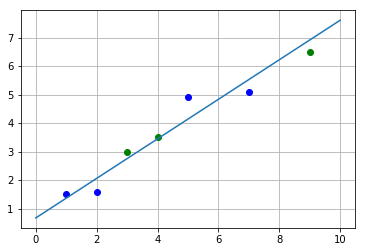

LS error (P=2) =  0.11763192851105009


In [15]:
#Use LR_CF function to calculate the Theta
Theta_ord2=LR_CF(X_Train_ord2,Y_Train)

#To draw the Graph, we set X to be array that starts at 0 and end at 10, with 0.001 step size
x=np.arange(0,10,0.001)

#Y_ord2 gives the Estimated value for each points in X array
Y_ord2=Theta_ord2[0]+Theta_ord2[1]*x

#We plot the points first Blue dots represent Training set and Green Dots represent Validation set
plt.plot(X_Train[:,1],Y_Train,'bo')
plt.plot(X_Val[:,1],Y_Val,'go')

#Plot X, and Y
plt.plot(x,Y_ord2)

#Plot Grid
plt.grid()
plt.show()

#Use LS_Err function to calculate the LS error for the Test set
print("LS error (P=2) = ",LS_Err(Theta_ord2,X_Val_ord2,Y_Val))

### 2) P=3 Case

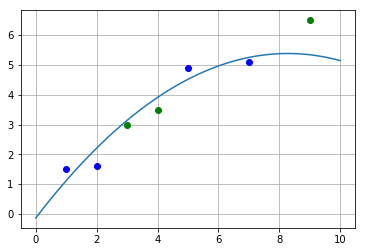

LS error (P=3) =  0.7640649238725294


In [17]:
"""
For P=3 case,

Calculate the Theta_Linear Regression
Draw Graph
Calculate LS_Err

HINT : Use Code for P=2 case
HINT : All 3 columns of data matrix is used (Do not have to delete last column)
"""
#To Test the P=3 case, Only first 3 columns are used.
X_Train_ord3=X_Train[:,:3]
X_Val_ord3=X_Val[:,:3]

#print(X_Val_ord2,"\n \n", X_Train_ord3)

#Use LR_CF function to calculate the Theta
Theta_ord3=LR_CF(X_Train_ord3,Y_Train)

#To draw the Graph, we set X to be array that starts at 0 and end at 10, with 0.001 step size
x=np.arange(0,10,0.001)

#Y_ord2 gives the Estimated value for each points in X array
Y_ord3=Theta_ord3[0]+Theta_ord3[1]*x+Theta_ord3[2]*x*x

#We plot the points first Blue dots represent Training set and Green Dots represent Validation set
plt.plot(X_Train[:,1],Y_Train,'bo')
plt.plot(X_Val[:,1],Y_Val,'go')

#Plot X, and Y
plt.plot(x,Y_ord3)

#Plot Grid
plt.grid()
plt.show()

#Use LS_Err function to calculate the LS error for the Test set
print("LS error (P=3) = ",LS_Err(Theta_ord3,X_Val_ord3,Y_Val))

## Ridge Regression

In [18]:
#Lambda(Regularization constant) Array is given starts from 0 to 1 with stepsize 0.001
Lambda=np.arange(0,1,0.001)

#To track Ridge cost, LS_COST array is defined
LS_Cost=np.zeros(len(Lambda))

#The minimum Loss is set to 10
LS_min=10

In [19]:
#Find the lamda with smallest Cost
for i in range(len(Lambda)):
    _Lambda=Lambda[i]
    Temp=RR_CF(X_Train,Y_Train,_Lambda)
    LS=LS_Err(Temp,X_Val,Y_Val)
    LS_Cost[i]=LS
    if LS_min>LS:
        LS_min=LS
        L=i
        Theta_RR=Temp


In [20]:
print("LS error of Ridge Regression :",LS_min)
print("Optimal Lambda = ", Lambda[L])
print("Theta_Ridge = ", Theta_RR)

LS error of Ridge Regression : 0.02122081023295649
Optimal Lambda =  0.6880000000000001
Theta_Ridge =  [ 0.33301765  0.89750669 -0.02435174]


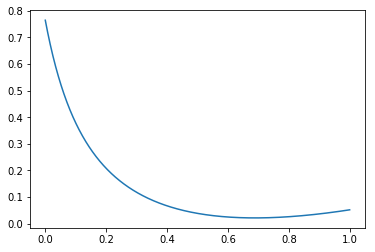

In [21]:
"""
Plot the lamda vs. Ridge cost graph (Lamda vs. LS_Cost)

Hint : use plt.plot function
"""

plt.plot(Lambda,LS_Cost)
plt.show()

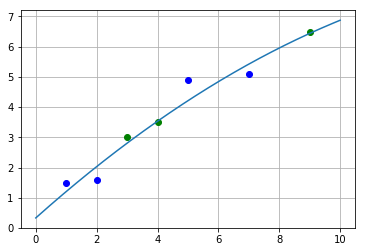

In [23]:
Y_RR=Theta_RR[0]+Theta_RR[1]*x+Theta_RR[2]*x**2

plt.plot(X_Train[:,1],Y_Train,'bo')
plt.plot(X_Val[:,1],Y_Val,'go')

plt.plot(x,Y_RR)
plt.grid()
plt.show()